In [119]:
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Bidirectional
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [120]:
import matplotlib.pyplot as plt
import pandas as pd

## 제출 방법

※ 내용은 분석(개발)배경, 활용 데이터 정의, 데이터 처리방안 및 활용 기법, 분석(개발) 결과, 서비스 활용방안, 기대효과를 포함하여야 함 

※ 타 공모전 수상작, 타인의 저작물 도용 등의 경우 심사제외 및 수상취소

※ 최종 프로젝트 발표 시 시연이 필요할 경우, 현장 실시간 시연을 원칙으로 함(녹화 동영상 불가

### 메모
고장 데이터 + 새롭게 생산하는 데이터 

합쳐서 재고관리 할 수 있는 방안??

In [121]:
df = pd.read_csv('svm_1.csv', engine= 'python')

In [4]:
df.head()

,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원),Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,소재부품,25288,1320467.0,249141801.0,676641651.0,677725336.0,25280383.0,NaN,NaN,NaN,NaN
1,11000,섬유제품,1128,37167.0,3605258.0,10406977.0,10376181.0,835453.0,NaN,NaN,NaN,NaN
2,11010,제사 및 방적,231,8850.0,640789.0,2336320.0,2325367.0,230446.0,NaN,NaN,NaN,NaN
3,11011,면방적,28,2784.0,168162.0,822629.0,817555.0,85228.0,NaN,NaN,NaN,NaN
4,11012,모방적,31,1143.0,90698.0,254704.0,251232.0,43691.0,NaN,NaN,NaN,NaN


In [32]:
df.shape

(315, 11)

In [5]:
del df['Unnamed: 8']

In [6]:
df.head()

,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원),Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,소재부품,25288,1320467.0,249141801.0,676641651.0,677725336.0,25280383.0,NaN,NaN,NaN
1,11000,섬유제품,1128,37167.0,3605258.0,10406977.0,10376181.0,835453.0,NaN,NaN,NaN
2,11010,제사 및 방적,231,8850.0,640789.0,2336320.0,2325367.0,230446.0,NaN,NaN,NaN
3,11011,면방적,28,2784.0,168162.0,822629.0,817555.0,85228.0,NaN,NaN,NaN
4,11012,모방적,31,1143.0,90698.0,254704.0,251232.0,43691.0,NaN,NaN,NaN


In [7]:
df.drop(['Unnamed: 9','Unnamed: 10','Unnamed: 11' ], axis =1, inplace = True )

In [8]:
df.head()

,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원)
0,0,소재부품,25288,1320467.0,249141801.0,676641651.0,677725336.0,25280383.0
1,11000,섬유제품,1128,37167.0,3605258.0,10406977.0,10376181.0,835453.0
2,11010,제사 및 방적,231,8850.0,640789.0,2336320.0,2325367.0,230446.0
3,11011,면방적,28,2784.0,168162.0,822629.0,817555.0,85228.0
4,11012,모방적,31,1143.0,90698.0,254704.0,251232.0,43691.0


In [ ]:
df.sort_values

In [13]:
# df.drop(0, inplace =True)
df.reset_index(inplace =True)

In [20]:
df.drop('index',axis =1, inplace =True)

In [21]:
df.head()

,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원)
0,11000,섬유제품,1128,37167.0,3605258.0,10406977.0,10376181.0,835453.0
1,11010,제사 및 방적,231,8850.0,640789.0,2336320.0,2325367.0,230446.0
2,11011,면방적,28,2784.0,168162.0,822629.0,817555.0,85228.0
3,11012,모방적,31,1143.0,90698.0,254704.0,251232.0,43691.0
4,11013,화학섬유 방적,69,2471.0,187716.0,670112.0,669316.0,59943.0


In [22]:
df['생산/재고'] = df['생산(백만원)']/ df['재고(백만원)']
df.head()

,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원),생산/재고
0,11000,섬유제품,1128,37167.0,3605258.0,10406977.0,10376181.0,835453.0,12.456688
1,11010,제사 및 방적,231,8850.0,640789.0,2336320.0,2325367.0,230446.0,10.138254
2,11011,면방적,28,2784.0,168162.0,822629.0,817555.0,85228.0,9.652098
3,11012,모방적,31,1143.0,90698.0,254704.0,251232.0,43691.0,5.829667
4,11013,화학섬유 방적,69,2471.0,187716.0,670112.0,669316.0,59943.0,11.179154


In [23]:
df['출하/재고'] =df['출하(백만원)']/ df['재고(백만원)']
df['사업체수/직원수'] = df['사업체수'] / df['종업원수']

In [27]:
df.head()

,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원),생산/재고,출하/재고,사업체수/직원수
0,11000,섬유제품,1128,37167.0,3605258.0,10406977.0,10376181.0,835453.0,12.456688,12.419826,0.030350
1,11010,제사 및 방적,231,8850.0,640789.0,2336320.0,2325367.0,230446.0,10.138254,10.090724,0.026102
2,11011,면방적,28,2784.0,168162.0,822629.0,817555.0,85228.0,9.652098,9.592563,0.010057
3,11012,모방적,31,1143.0,90698.0,254704.0,251232.0,43691.0,5.829667,5.750200,0.027122
4,11013,화학섬유 방적,69,2471.0,187716.0,670112.0,669316.0,59943.0,11.179154,11.165874,0.027924


In [28]:
## 기본 info 

df[df['소재부품코드명'] == '반도체제조 장비 부품']

,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원),생산/재고,출하/재고,사업체수/직원수
189,22161,반도체제조 장비 부품,376,13592.0,1616541.0,3535978.0,3512857.0,99462.0,35.551045,35.318584,0.027663


svm텍 산업현황

In [44]:
## 재고 기준 나열 
## 단위당 제품 가격이 다르니까 일단 오케이 

df_stock1 = df.sort_values('재고(백만원)',ascending = False).reset_index()
df_stock1[df_stock1['소재부품코드명'] == '반도체제조 장비 부품']

# 127개중 175번쨰 

,index,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원),생산/재고,출하/재고,사업체수/직원수
126,189,22161,반도체제조 장비 부품,376,13592.0,1616541.0,3535978.0,3512857.0,99462.0,35.551045,35.318584,0.027663


In [41]:
## 생산/재고 수준 ★
## 59번째 꽤 높은수준 

df_stock2 = df.sort_values('생산/재고', ascending = False).reset_index()
df_stock2[df_stock2['소재부품코드명'] == '반도체제조 장비 부품']


# 59번째 

,index,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원),생산/재고,출하/재고,사업체수/직원수
58,189,22161,반도체제조 장비 부품,376,13592.0,1616541.0,3535978.0,3512857.0,99462.0,35.551045,35.318584,0.027663


In [42]:
## 부가가치
## 부가가치 또한 높은 편에 속한다 


df_stock3 = df.sort_values('부가가치(백만원)',ascending = False).reset_index()
df_stock3[df_stock3['소재부품코드명'] == '반도체제조 장비 부품']

# 부가가치 84 번쨰 

,index,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원),생산/재고,출하/재고,사업체수/직원수
83,189,22161,반도체제조 장비 부품,376,13592.0,1616541.0,3535978.0,3512857.0,99462.0,35.551045,35.318584,0.027663


In [46]:
## 출하/ 재고 
#높다 


df_stock4 = df.sort_values('출하/재고',ascending = False).reset_index()
df_stock4[df_stock4['소재부품코드명'] == '반도체제조 장비 부품']

## 출하/ 재고 61번째 

,index,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원),생산/재고,출하/재고,사업체수/직원수
60,189,22161,반도체제조 장비 부품,376,13592.0,1616541.0,3535978.0,3512857.0,99462.0,35.551045,35.318584,0.027663


In [78]:
pl1 = df[['생산/재고','출하/재고']].mean()
pl2 = df[['생산/재고','출하/재고']].std()



#pl25 =
#pl50 = 
#pl75 =

In [80]:
tt = df[['생산/재고','출하/재고']].describe().drop(['count','min','25%','50%','75%', 'max'])

In [81]:
tt

,생산/재고,출하/재고
mean,27.813237,27.825119
std,21.440467,21.455840


In [82]:
pt = df[df['소재부품코드명'] == '반도체제조 장비 부품']

In [84]:
pt = pt[['생산/재고','출하/재고']]

In [93]:
t1 = tt.drop('std')

In [105]:
pt

,생산/재고,출하/재고
189,35.551045,35.318584


In [95]:
t1

,생산/재고,출하/재고
mean,27.813237,27.825119


In [106]:
pt.reset_index(inplace=True)

In [108]:
pt.drop('index', axis = 1 ,inplace=True)

In [110]:
t1.reset_index(inplace=True)
t1.drop('index', axis = 1 ,inplace=True)


In [122]:
t1

,생산/재고,출하/재고
0,27.813237,27.825119


df.reset_index(inplace =True)

In [123]:
pt

,생산/재고,출하/재고
0,35.551045,35.318584


In [160]:
import matplotlib.font_manager as fm

font_path = 'malgun.ttf'
fontprop = fm.FontProperties(fname=font_path, size=16)


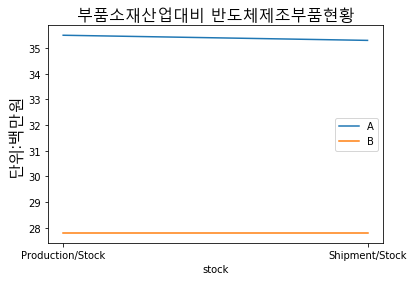

In [165]:
plt.plot(['Production/Stock','Shipment/Stock'], [35.5,35.3])
plt.plot(['Production/Stock','Shipment/Stock'], [27.8,27.8])

plt.xlabel('stock')
plt.ylabel('단위:백만원', fontproperties=fontprop)
plt.title('부품소재산업대비 반도체제조부품현황',fontproperties=fontprop)
plt.legend(['A','B'])

plt.show()

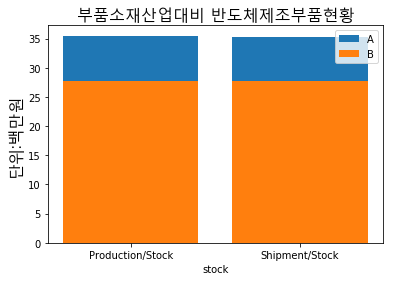

In [167]:
plt.bar(['Production/Stock','Shipment/Stock'], [35.5,35.3])
plt.bar(['Production/Stock','Shipment/Stock'], [27.8,27.8])

plt.xlabel('stock')
plt.ylabel('단위:백만원', fontproperties=fontprop)
plt.title('부품소재산업대비 반도체제조부품현황',fontproperties=fontprop)
plt.legend(['A','B'])

plt.show()

In [146]:
plt.xlabel?

In [156]:
plt.plot?

In [127]:
qq = pd.concat([t1,pt], axis=0 )

In [129]:
qq.reset_index(inplace= True)

In [132]:
qq.drop('index', inplace = True, axis=1)
qq

,생산/재고,출하/재고
0,27.813237,27.825119
1,35.551045,35.318584


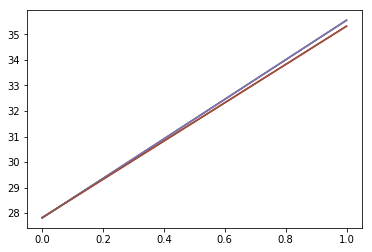

In [135]:
plt.plot(qq)
plt.show()

In [ ]:
plt

In [49]:
## 기본 info 

df[df['소재부품코드명'] == '반도체제조 장비 부품']

,소재부품코드,소재부품코드명,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원),생산/재고,출하/재고,사업체수/직원수
189,22161,반도체제조 장비 부품,376,13592.0,1616541.0,3535978.0,3512857.0,99462.0,35.551045,35.318584,0.027663


In [ ]:
plt.plot()

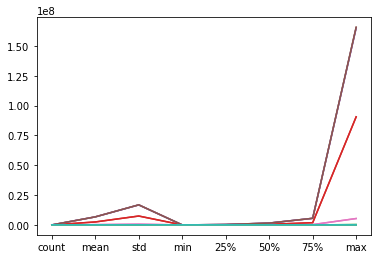

In [55]:
plt.plot(df.describe())
plt.show()

In [ ]:
pd.merge()

In [98]:
df.describe().round()

,소재부품코드,사업체수,종업원수,부가가치(백만원),생산(백만원),출하(백만원),재고(백만원),생산/재고,출하/재고,사업체수/직원수
count,315.0,315.0,301.0,301.0,301.0,301.0,301.0,301.0,301.0,301.0
mean,20019.0,241.0,13155.0,2478676.0,6731268.0,6742061.0,251238.0,28.0,28.0,0.0
std,5529.0,539.0,29407.0,7443781.0,16768335.0,16813924.0,579852.0,21.0,21.0,0.0
min,11000.0,0.0,66.0,5426.0,9223.0,9182.0,134.0,3.0,3.0,0.0
25%,14070.0,21.0,1143.0,152074.0,344552.0,341798.0,16484.0,16.0,16.0,0.0
50%,22072.0,70.0,3883.0,529293.0,1533446.0,1532391.0,63085.0,24.0,24.0,0.0
75%,25020.0,204.0,10401.0,1828890.0,5545740.0,5534595.0,253500.0,33.0,33.0,0.0
max,27111.0,5180.0,270177.0,90564023.0,164992892.0,165626999.0,5355621.0,215.0,216.0,0.0


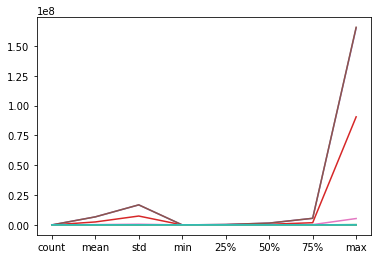

In [99]:
plt.plot(df.describe().round())
plt.show()